# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

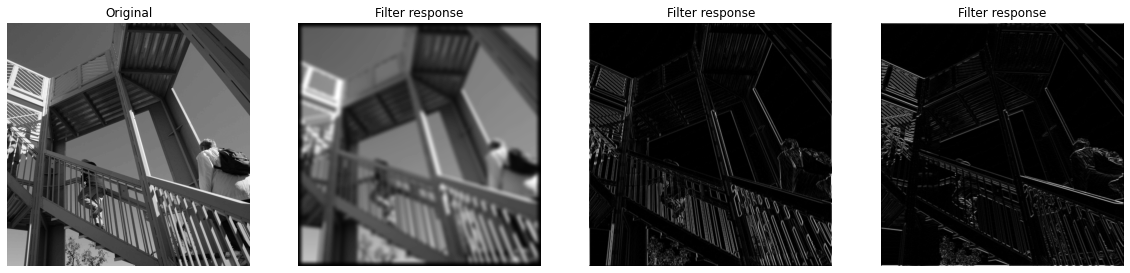

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


In [4]:
# Your code for checking sizes of image and filter responses

"""
Q1. Gaussian filter blurs the image, SobelX enhances the vertical patterns, and SobelY enhances the horizontal patterns in the image.
"""

# Q2.
print(f"size of original image: {image.shape}")
"""
The original image has only one channel as it is a greyscale image. A color image normally has 3 channels.
"""

# Q3.
print(f"size of gaussian filter: {gaussFilter.shape}\nsize of SobelX filter: {sobelX.shape}\nsize of SobelY filter: {sobelY.shape}")

"""
Q4. If 'same' mode is used, filter response has the same size as the image.

Q5. If 'valid' mode is used, filter response has size (l1-l2+1, w1-w2+1), where l1, l2, w1, w2 are lengths and widths of input image and filter respectively.
As we can see, the size of response depends on both the size of the image and the size of the filter.

Q6. In CNNs with many layers, if each layer uses 'valid' filters, then the filter response will become smaller and smaller for each subsequent layer.
"""

size of original image: (512, 512)
size of gaussian filter: (15, 15)
size of SobelX filter: (3, 3)
size of SobelY filter: (3, 3)


"\nQ4. If 'same' mode is used, filter response has the same size as the image.\n\nQ5. If 'valid' mode is used, filter response has size (l1-l2+1, w1-w2+1), where l1, l2, w1, w2 are lengths and widths of input image and filter respectively.\nAs we can see, the size of response depends on both the size of the image and the size of the filter.\n\nQ6. In CNNs with many layers, if each layer uses 'valid' filters, then the filter response will become smaller and smaller for each subsequent layer.\n"

##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

In [6]:
"""
Q7. Filters used for color images have an extra dimension for the different channels of the image.

Q8. What is usually called convolution in neural networks (and image processing) is not exactly the mathematical concept of convolution, 
which is what convolve2d implements, but the similar one of correlation, which is implemented by correlate2d.

Q9. 
"""

'\nQ7. Filters used for color images have an extra dimension for the different channels of the image.\n\nQ8. What is usually called convolution in neural networks (and image processing) is not exactly the mathematical concept of convolution, \nwhich is what convolve2d implements, but the similar one of correlation, which is implemented by correlate2d.\n\nQ9. \n'

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [20]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

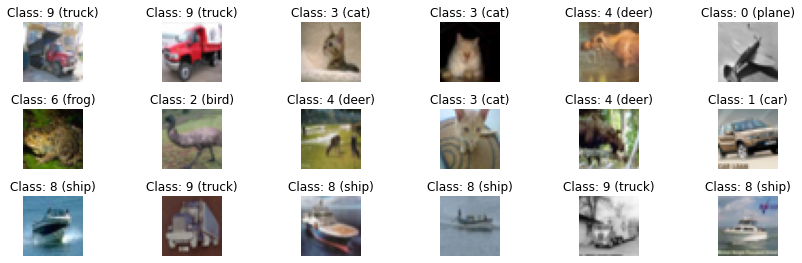

In [21]:
plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain)

# Print the size of training data, validation data and test data
print(f"size:\nXtrain: {Xtrain.shape}, Ytrain: {Ytrain.shape}\nXval: {Xval.shape}, Yval: {Yval.shape}\nXtest: {Xtest.shape}, Ytest: {Ytest.shape}")

size:
Xtrain: (7500, 32, 32, 3), Ytrain: (7500, 1)
Xval: (2500, 32, 32, 3), Yval: (2500, 1)
Xtest: (2000, 32, 32, 3), Ytest: (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [23]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [24]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print(f"size of labels before converting:\nYtrain: {Ytrain.shape}\nYval: {Yval.shape}\nYtest: {Ytest.shape}")

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, 10, "int32")
Yval = to_categorical(Yval, 10, "int32")
Ytest = to_categorical(Ytest, 10, "int32")

# Print shapes after converting the labels
print(f"size of labels after converting:\nYtrain: {Ytrain.shape}\nYval: {Yval.shape}\nYtest: {Ytest.shape}")

size of labels before converting:
Ytrain: (7500, 1)
Yval: (2500, 1)
Ytest: (2000, 1)
size of labels after converting:
Ytrain: (7500, 10)
Yval: (2500, 10)
Ytest: (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [49]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, dropout_rate = 0.5, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters, kernel_size = 3, padding = "same", activation = "relu", input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = 2))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        n_filters *= 2
        model.add(Conv2D(filters = n_filters, kernel_size = 3, padding = "same", activation = "relu"))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size = 2))
    
    # Add flatten layer
    model.add(Flatten())
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(units = n_nodes, activation = "relu"))
        if use_dropout == True:
            model.add(Dropout(rate = dropout_rate))
        model.add(BatchNormalization())
        
    # Add final dense layer
    model.add(Dense(units = 10, activation = "softmax"))
   
    # Compile model
    model.compile(optimizer = Adam(learning_rate = learning_rate), loss = CategoricalCrossentropy(), metrics = ["accuracy"])
    return model

In [32]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [34]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]
#print(input_shape)
# Build model
model1 = build_CNN(input_shape = input_shape)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size, epochs, validation_data = (Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 91ms/step - loss: 3.1024 - accuracy: 0.3141 - val_loss: 2.1555 - val_accuracy: 0.2788
Epoch 2/20
75/75 [==============================] - 6s 75ms/step - loss: 1.5670 - accuracy: 0.4837 - val_loss: 1.6664 - val_accuracy: 0.4084
Epoch 3/20
75/75 [==============================] - 5s 69ms/step - loss: 1.2588 - accuracy: 0.5615 - val_loss: 1.5370 - val_accuracy: 0.4476
Epoch 4/20
75/75 [==============================] - 5s 64ms/step - loss: 1.1001 - accuracy: 0.6135 - val_loss: 1.4106 - val_accuracy: 0.5120
Epoch 5/20
75/75 [==============================] - 5s 65ms/step - loss: 1.0005 - accuracy: 0.6491 - val_loss: 1.2598 - val_accuracy: 0.5488
Epoch 6/20
75/75 [==============================] - 5s 65ms/step - loss: 0.9137 - accuracy: 0.6797 - val_loss: 1.5788 - val_accuracy: 0.4940
Epoch 7/20
75/75 [==============================] - 5s 68ms/step - loss: 0.8553 - accuracy: 0.7032 - val_loss: 1.3661 - val_accuracy: 0.5548
Epoch 8/20
75

In [35]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 2.8725 - accuracy: 0.5350
Test loss: 2.8725
Test accuracy: 0.5350


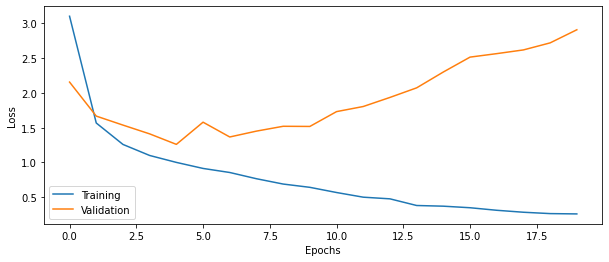

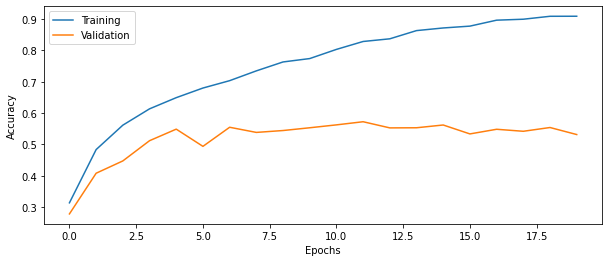

In [36]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

In [47]:
print(f"test accuracy: {score[1]}")
# classifier performance is poor

"""
Q10. Training accuracy is around 90%, while test accuracy is very low at around 50%, which shows a big generalization gap.

Q11. A convolution layer will give n_filters output channels for each input image, where n_filters represents the number of filters, which will increase
amount of input for the next convolution layer, which in turn will further multiply the input according to its number of filters. So it will be
appropriate to use a smaller batch size to prevent out of memory errors.
"""

test accuracy: 0.6129999756813049


'\nQ10. Training accuracy is around 90%, while test accuracy is very low at around 50%, which shows a big generalization gap.\n\nQ11. A convolution layer will give n_filters output channels for each input image, where n_filters represents the number of filters, which will increase\namount of input for the next convolution layer, which in turn will further multiply the input according to its number of filters. So it will be\nappropriate to use a smaller batch size to prevent out of memory errors.\n'

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [39]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape = input_shape, n_dense_layers = 1)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, batch_size, epochs, validation_data = (Xval, Yval))

Epoch 1/20
75/75 [==============================] - 6s 74ms/step - loss: 1.6446 - accuracy: 0.4141 - val_loss: 1.9368 - val_accuracy: 0.3080
Epoch 2/20
75/75 [==============================] - 5s 71ms/step - loss: 1.2572 - accuracy: 0.5563 - val_loss: 1.9133 - val_accuracy: 0.3224
Epoch 3/20
75/75 [==============================] - 6s 74ms/step - loss: 1.0416 - accuracy: 0.6321 - val_loss: 1.6130 - val_accuracy: 0.4428
Epoch 4/20
75/75 [==============================] - 5s 73ms/step - loss: 0.8682 - accuracy: 0.6996 - val_loss: 1.7961 - val_accuracy: 0.4620
Epoch 5/20
75/75 [==============================] - 5s 73ms/step - loss: 0.7000 - accuracy: 0.7599 - val_loss: 1.5600 - val_accuracy: 0.5200
Epoch 6/20
75/75 [==============================] - 5s 72ms/step - loss: 0.5461 - accuracy: 0.8113 - val_loss: 1.6783 - val_accuracy: 0.5464
Epoch 7/20
75/75 [==============================] - 5s 72ms/step - loss: 0.4101 - accuracy: 0.8593 - val_loss: 1.9596 - val_accuracy: 0.5392
Epoch 8/20
75

In [40]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 3.0260 - accuracy: 0.5655
Test loss: 3.0260
Test accuracy: 0.5655


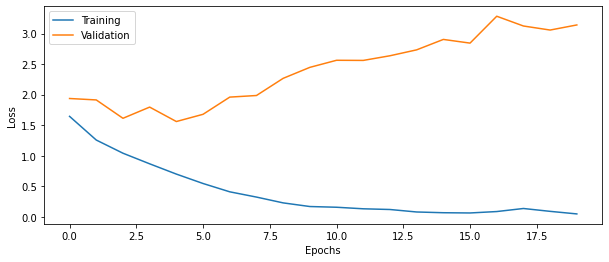

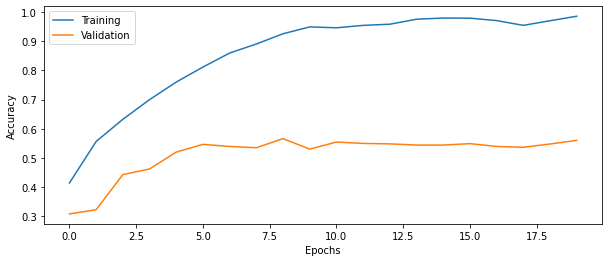

In [41]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [42]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape = input_shape, n_conv_layers = 4, n_dense_layers = 1)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, batch_size, epochs, validation_data = (Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 101ms/step - loss: 1.7375 - accuracy: 0.3777 - val_loss: 2.1484 - val_accuracy: 0.3288
Epoch 2/20
75/75 [==============================] - 8s 100ms/step - loss: 1.3593 - accuracy: 0.4980 - val_loss: 2.1231 - val_accuracy: 0.2936
Epoch 3/20
75/75 [==============================] - 7s 98ms/step - loss: 1.1784 - accuracy: 0.5704 - val_loss: 1.6204 - val_accuracy: 0.4276
Epoch 4/20
75/75 [==============================] - 7s 99ms/step - loss: 1.0141 - accuracy: 0.6368 - val_loss: 1.7330 - val_accuracy: 0.4728
Epoch 5/20
75/75 [==============================] - 7s 97ms/step - loss: 0.8468 - accuracy: 0.6992 - val_loss: 1.4578 - val_accuracy: 0.5884
Epoch 6/20
75/75 [==============================] - 7s 96ms/step - loss: 0.7121 - accuracy: 0.7539 - val_loss: 1.6594 - val_accuracy: 0.5816
Epoch 7/20
75/75 [==============================] - 7s 97ms/step - loss: 0.5548 - accuracy: 0.8035 - val_loss: 1.4041 - val_accuracy: 0.6068
Epoch 8/20


In [43]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 11ms/step - loss: 2.7096 - accuracy: 0.6130
Test loss: 2.7096
Test accuracy: 0.6130


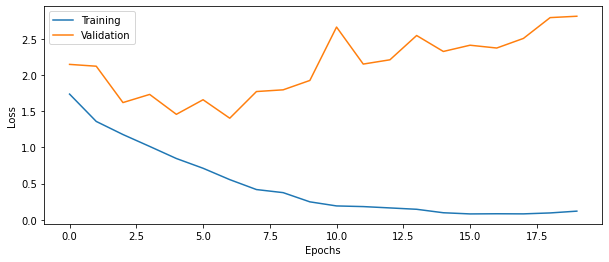

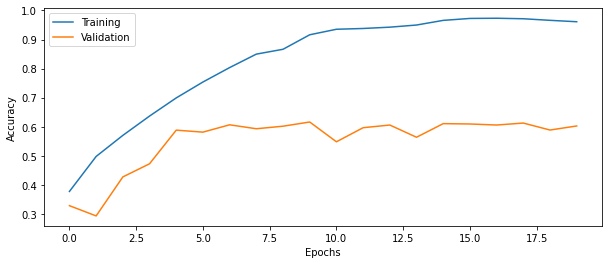

In [44]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 17: How does MaxPooling help in reducing the number of parameters to train?

In [48]:
# Print network architecture

model3.summary()

"""
Q12. Number of trainable prarameters: 124,180. The last convolution layer has most parameters.

Q13. Input to a Conv2D layer is a 4D tensor, where the 4 dimensions represent: (batch_size, input_rows, input_cols, num_input_channels) in our case.
Output is another 4D tensor: (batch_size, output_rows, output_cols, num_output_channels) 

Q14. Yes, batch size is always the first dimension of each 4D tensor.

Q15. Number of output channels will be equal to the number of filters in the layer, which in this case is 128.

Q16. The number of parameters for each convolution layer is equal to: n_filters * n_coefficients * n_input_channels + biases. This is because it has 
separate coefficients for each input channel.

Q17. MaxPooling layer reduces the size of output channels of the previous convolution layer, so the output channel size will progressively decrease
after each pooling layer. Although it does not impact the number of parameters for the next convolution layer, it does have a great effect on the
output size of the flatten layer, which reduces the number of parameters for the subsequent dense layers.
"""

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

'\nQ12. Number of trainable prarameters: 124,180. The last convolution layer has most parameters.\n\nQ13. Input to a Conv2D layer is a 4D tensor, where the 4 dimensions represent: (batch_size, input_rows, input_cols, num_input_channels) in our case.\nOutput is another 4D tensor: (batch_size, output_rows, output_cols, num_output_channels) \n\nQ14. Yes, batch size is always the first dimension of each 4D tensor.\n\nQ15. Number of output channels will be equal to the number of filters in the layer, which in this case is 128.\n\nQ16. The number of parameters for each convolution layer is equal to: n_filters * n_coefficients * n_input_channels + biases. This is because it has \nseparate coefficients for each input channel.\n\nQ17. MaxPooling layer reduces the size of output channels of the previous convolution layer, so the output channel size will progressively decrease\nafter each pooling layer. Although it does not impact the number of parameters for the next convolution layer, it does h

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [50]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers = 4, n_dense_layers = 1, use_dropout = True)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, batch_size, epochs, validation_data = (Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 100ms/step - loss: 1.9498 - accuracy: 0.2884 - val_loss: 1.7411 - val_accuracy: 0.3548
Epoch 2/20
75/75 [==============================] - 7s 98ms/step - loss: 1.5922 - accuracy: 0.4059 - val_loss: 1.7690 - val_accuracy: 0.3764
Epoch 3/20
75/75 [==============================] - 7s 96ms/step - loss: 1.4660 - accuracy: 0.4563 - val_loss: 1.6737 - val_accuracy: 0.4000
Epoch 4/20
75/75 [==============================] - 7s 99ms/step - loss: 1.3458 - accuracy: 0.5003 - val_loss: 1.3938 - val_accuracy: 0.4976
Epoch 5/20
75/75 [==============================] - 7s 98ms/step - loss: 1.2315 - accuracy: 0.5464 - val_loss: 1.2580 - val_accuracy: 0.5500
Epoch 6/20
75/75 [==============================] - 7s 98ms/step - loss: 1.1345 - accuracy: 0.5889 - val_loss: 1.3285 - val_accuracy: 0.5328
Epoch 7/20
75/75 [==============================] - 7s 98ms/step - loss: 1.0483 - accuracy: 0.6203 - val_loss: 1.2720 - val_accuracy: 0.5576
Epoch 8/20
7

In [51]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 12ms/step - loss: 1.8964 - accuracy: 0.5975
Test loss: 1.8964
Test accuracy: 0.5975


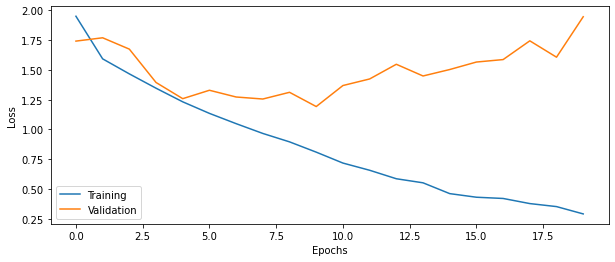

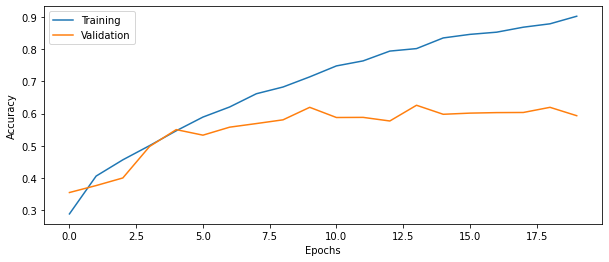

In [52]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

## Your best config

In [82]:
# Setup some training parameters
batch_size = 100
epochs = 30
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape, n_conv_layers=5, n_filters=16, n_dense_layers=6, n_nodes=60, use_dropout=True, dropout_rate=0.3, learning_rate=0.005)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, batch_size, epochs, validation_data = (Xval, Yval))

Epoch 1/30
75/75 [==============================] - 11s 117ms/step - loss: 2.4477 - accuracy: 0.1423 - val_loss: 2.9931 - val_accuracy: 0.1132
Epoch 2/30
75/75 [==============================] - 8s 108ms/step - loss: 2.0216 - accuracy: 0.2196 - val_loss: 3.2687 - val_accuracy: 0.1368
Epoch 3/30
75/75 [==============================] - 8s 109ms/step - loss: 1.8756 - accuracy: 0.2563 - val_loss: 3.6822 - val_accuracy: 0.1176
Epoch 4/30
75/75 [==============================] - 8s 109ms/step - loss: 1.7860 - accuracy: 0.2993 - val_loss: 2.7922 - val_accuracy: 0.1956
Epoch 5/30
75/75 [==============================] - 8s 109ms/step - loss: 1.7221 - accuracy: 0.3185 - val_loss: 2.1016 - val_accuracy: 0.2776
Epoch 6/30
75/75 [==============================] - 8s 109ms/step - loss: 1.6594 - accuracy: 0.3455 - val_loss: 1.7262 - val_accuracy: 0.3564
Epoch 7/30
75/75 [==============================] - 8s 109ms/step - loss: 1.5848 - accuracy: 0.3789 - val_loss: 1.5895 - val_accuracy: 0.3800
Epoch

In [87]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 13ms/step - loss: 1.7640 - accuracy: 0.5145
Test loss: 1.7640
Test accuracy: 0.5145


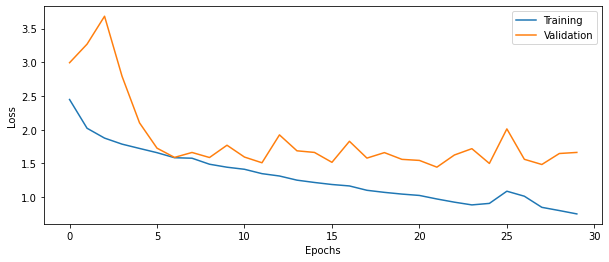

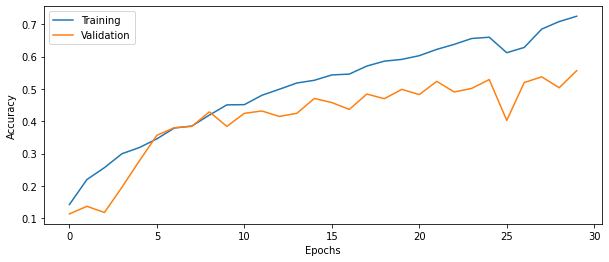

test accuracy obtained: 0.5145000219345093


In [88]:
# Plot the history from the training run
plot_results(history5)

#Q20
print(f"test accuracy obtained: {score[1]}")

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [89]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

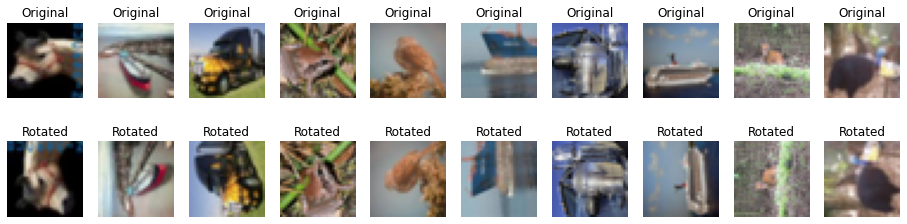

In [90]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [91]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

#Q21. Difference in accuracy may be attributed to the reason that our model was trained on upright images, and did not encounter any rotated images
# during training.

63/63 [==============================] - 1s 13ms/step - loss: 3.6576 - accuracy: 0.2310
Test loss: 3.6576
Test accuracy: 0.2310


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

In [92]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [95]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True, validation_split=0.2)


# Setup a flow for training data, assume that we can fit all images into CPU memory
datagen.fit(Xtrain)
history6 = model5.fit(datagen.flow(Xtrain, Ytrain, batch_size=100,
         subset='training'),
         validation_data=datagen.flow(Xtrain, Ytrain,
         batch_size=50, subset='validation'),
         steps_per_epoch=len(Xtrain) / 100, epochs=epochs)
# Setup a flow for validation data, assume that we can fit all images into CPU memory


Epoch 1/30
100/100 [==============================] - 11s 106ms/step - loss: 1.6473 - accuracy: 0.4104 - val_loss: 1.5466 - val_accuracy: 0.4415


## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

In [ ]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 24: What other types of image augmentation can be applied, compared to what we use here?

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = ?

# Build model (your best config)
model6 = 

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = 

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [ ]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

In [ ]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

Question 28: How many trainable parameters does the ResNet50 network have? 

Question 29: What is the size of the images that ResNet50 expects as input?

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.


